# Simulated time series

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/nihcompmed/fem/master?filepath=doc%2Fnotebooks%2Fcontinuous%2F01_simulated_time_series.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fem
print 'number of threads: %i' % (fem.fortran_module.fortran_module.num_threads(),)

number of threads: 32


In [2]:
n = 10
w = fem.continuous.model_parameters(n)

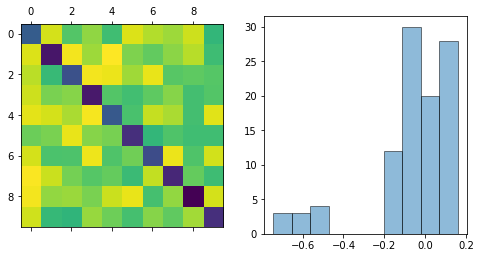

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].matshow(w)
w_flat = w.flatten()
hist = ax[1].hist(w_flat, ec='k', alpha=0.5)
plt.show()

In [4]:
x = fem.continuous.time_series(w, l=1e4)

In [5]:
tab = []
for i in range(n):
    tab.append([x[i].min(), x[i].max(), x[i].mean()])
pd.DataFrame(data=tab, columns=['min', 'max', 'average'], index=1+np.arange(n))

,min,max,average
1,-4.410493,4.337982,-0.015959
2,-4.389126,4.446892,0.016419
3,-4.850903,4.906681,-0.042921
4,-3.755630,4.802334,-0.031177
5,-4.678157,5.018774,0.049137
6,-4.366998,4.698513,-0.024123
7,-4.781676,4.374423,-0.006386
8,-3.953204,4.367646,0.035740
9,-4.099511,4.192780,0.027330
10,-4.692019,4.091800,0.011961


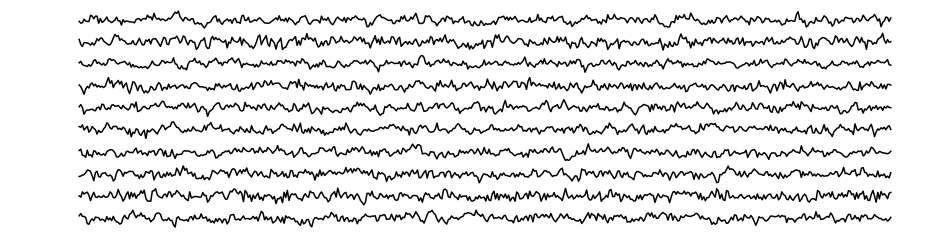

In [6]:
fig, ax = plt.subplots(n, 1, figsize=(16, 4))
for i in range(n):
    ax[i].plot(x[i, :500], 'k-')
    ax[i].axis('off')

In [7]:
model = fem.continuous.model()
x1, x2 = x[:,:-1], x[:,1:]
model.fit(x1, x2, iters=10)

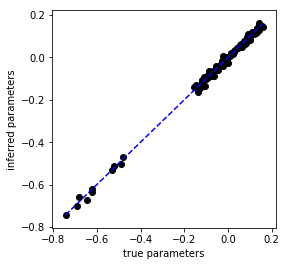

In [11]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()
w_fit_flat = model.w.flatten()
ax.scatter(w_flat, w_fit_flat, c='k')
grid = np.linspace(w.min(), w.max())
ax.plot(grid, grid, 'b--')
ax.set_xlabel('true parameters')
ax.set_ylabel('inferred parameters')
plt.show()

In [9]:
x2_prediction = model.predict(x1)

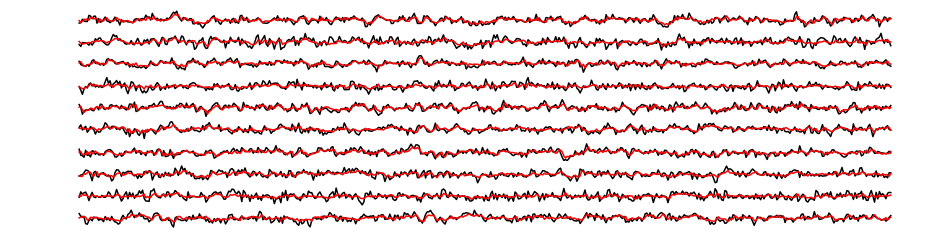

In [10]:
fig, ax = plt.subplots(n, 1, figsize=(16, 4))
for i in range(n):
    ax[i].plot(x2[i, :500], 'k-')
    ax[i].plot(x2_prediction[i, :500], 'r-')
    ax[i].axis('off')
plt.show()